### Import libraries

In [1]:
library(twitteR)
library(RSQLite)
library(tm)

Warning message:
"package 'twitteR' was built under R version 3.3.3"Warning message:
"package 'RSQLite' was built under R version 3.3.3"Warning message:
"package 'tm' was built under R version 3.3.3"Loading required package: NLP


###  Setting auth for twitter

In [2]:
api_key <- "uEiKnIqgXOfh0U8yvPjutUpCI" # From dev.twitter.com
api_secret <- "T84205g6C0CM9kzpT7qIgrmdI3YhIHd9EdZNMDVcHavAwWBWmw" # From dev.twitter.com
token <- "772223557401243648-zOmAjR7o2zkUr7DxbHgt1jVrN2P9NnW" # From dev.twitter.com
token_secret <- "z8VVETm5iC7UL2jlNbSe5AqCGyYjeeDbQwfIwiOsuGW6d" # From dev.twitter.com
 
# Create Twitter Connection
setup_twitter_oauth(api_key, api_secret, token, token_secret)

[1] "Using direct authentication"


### Collect tweets

In [ ]:
topic <- "#GameofThrones"
tweets <- searchTwitter(topic, n=10000, lang = 'en')
actual_tweets <- strip_retweets(tweets, strip_manual=TRUE, strip_mt=TRUE)
frame_tweets <- twListToDF(actual_tweets)

### Preprocess the tweets 

In [ ]:
myCorpus <- Corpus(VectorSource(frame_tweets$text))
myCorpus <- tm_map(myCorpus, removePunctuation)
myCorpus <- tm_map(myCorpus, removeNumbers)
removeURL <- function(x) gsub("http[[:alnum:]]*", "", x)
myCorpus <- tm_map(myCorpus, content_transformer(removeURL))
myCorpus <- tm_map(myCorpus, removeWords,stopwords("en"))
myCorpus <- tm_map(myCorpus, content_transformer(tolower))

### Writing to text file

In [ ]:
dataframe <- data.frame(text=sapply(myCorpus, identity), 
    stringsAsFactors=F)
write.table(dataframe,"tweets.txt",sep="\n",row.names=FALSE)

### Load word cloud library

In [5]:
library(wordcloud)
library(RColorBrewer)
library(tm)
library(SnowballC)

Warning message:
"package 'wordcloud' was built under R version 3.3.3"Loading required package: RColorBrewer


### Read converted CSV file generated from mapreduce

In [8]:
file <- read.csv("wordcount1.csv");
colnames(file) <- c("word", "freq")

### Execute the word cloud

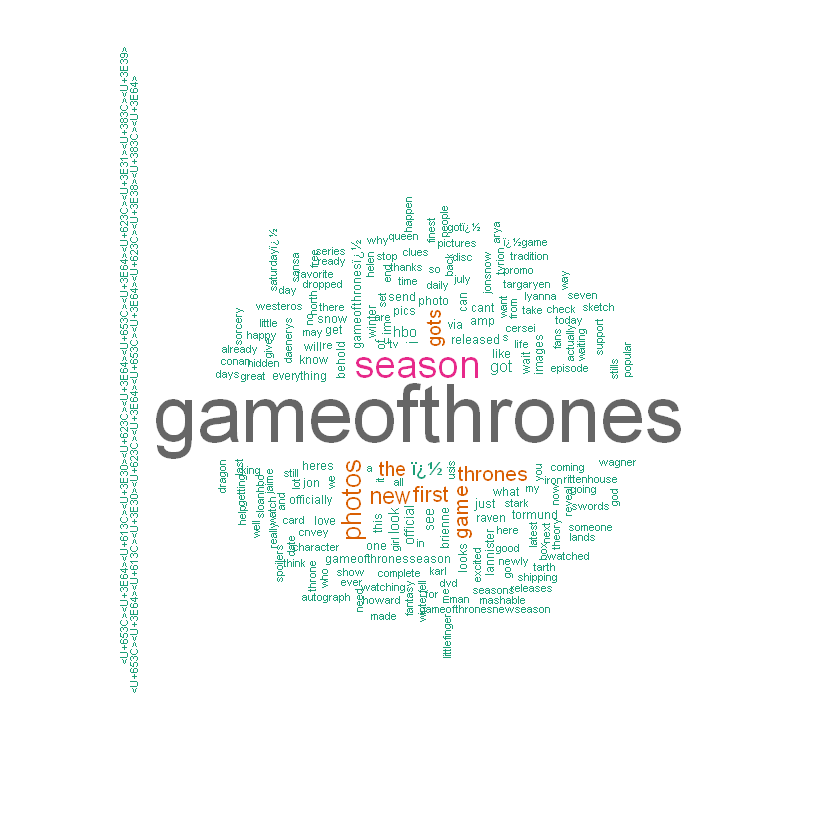

In [9]:
wordcloud(file$word,file$freq, min.freq = 1,
          max.words=200, random.order=FALSE, rot.per=0.35, 
          colors=brewer.pal(8, "Dark2"))